In [1]:
# Iris Species Classification with Decision Tree
# Classical Machine Learning using Scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')



In [2]:
# Step 1: Load and Explore the Dataset
print("=" * 50)
print("STEP 1: LOADING AND EXPLORING THE DATASET")
print("=" * 50)

# Load the Iris dataset from scikit-learn
iris = load_iris()
print("Dataset loaded successfully!")



STEP 1: LOADING AND EXPLORING THE DATASET
Dataset loaded successfully!


In [3]:
# Create a DataFrame for better visualization and handling
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species_name'] = df['species'].apply(lambda x: iris.target_names[x])

print("\nDataset Overview:")
print(f"Dataset shape: {df.shape}")
print(f"Features: {iris.feature_names}")
print(f"Target classes: {list(iris.target_names)}")

print("\nFirst 5 rows of the dataset:")
print(df.head())

print("\nDataset Information:")
print(df.info())

print("\nBasic Statistics:")
print(df.describe())

print("\nClass distribution:")
print(df['species_name'].value_counts())




Dataset Overview:
Dataset shape: (150, 6)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: [np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 column

In [4]:
# Step 2: Data Preprocessing
print("\n" + "=" * 50)
print("STEP 2: DATA PREPROCESSING")
print("=" * 50)

# Check for missing values
print("\nChecking for missing values:")
print(df.isnull().sum())

# Since there are no missing values in this dataset, we can proceed
print("No missing values found in the dataset.")

# Encode labels (though they are already encoded as 0,1,2 in this dataset)
# We'll demonstrate label encoding for educational purposes
le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species_name'])

print(f"\nLabel encoding mapping:")
for i, class_name in enumerate(le.classes_):
    print(f"  {class_name} -> {i}")

# Prepare features and target variable
X = df[iris.feature_names]  # Features
y = df['species_encoded']   # Target variable

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")




STEP 2: DATA PREPROCESSING

Checking for missing values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
species_name         0
dtype: int64
No missing values found in the dataset.

Label encoding mapping:
  setosa -> 0
  versicolor -> 1
  virginica -> 2

Features shape: (150, 4)
Target shape: (150,)


In [5]:
# Step 3: Split the Data into Training and Testing Sets
print("\n" + "=" * 50)
print("STEP 3: TRAIN-TEST SPLIT")
print("=" * 50)

# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,  # for reproducibility
    stratify=y        # maintain class distribution in splits
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Training set class distribution:\n{y_train.value_counts().sort_index()}")
print(f"Testing set class distribution:\n{y_test.value_counts().sort_index()}")




STEP 3: TRAIN-TEST SPLIT
Training set size: 120 samples
Testing set size: 30 samples
Training set class distribution:
species_encoded
0    40
1    40
2    40
Name: count, dtype: int64
Testing set class distribution:
species_encoded
0    10
1    10
2    10
Name: count, dtype: int64


In [6]:
# Step 4: Train the Decision Tree Classifier
print("\n" + "=" * 50)
print("STEP 4: TRAINING DECISION TREE CLASSIFIER")
print("=" * 50)

# Create and train the decision tree classifier
dt_classifier = DecisionTreeClassifier(
    random_state=42,  # for reproducibility
    max_depth=3       # limit tree depth to prevent overfitting
)

print("Training the Decision Tree classifier...")
dt_classifier.fit(X_train, y_train)
print("Training completed successfully!")

print(f"\nDecision Tree parameters:")
print(f"Max depth: {dt_classifier.get_depth()}")
print(f"Number of leaves: {dt_classifier.get_n_leaves()}")




STEP 4: TRAINING DECISION TREE CLASSIFIER
Training the Decision Tree classifier...
Training completed successfully!

Decision Tree parameters:
Max depth: 3
Number of leaves: 5


In [7]:
# Step 5: Make Predictions
print("\n" + "=" * 50)
print("STEP 5: MAKING PREDICTIONS")
print("=" * 50)

# Predict on training and testing sets
y_train_pred = dt_classifier.predict(X_train)
y_test_pred = dt_classifier.predict(X_test)

print("Predictions completed on both training and test sets.")




STEP 5: MAKING PREDICTIONS
Predictions completed on both training and test sets.


In [8]:
# Step 6: Evaluate the Model
print("\n" + "=" * 50)
print("STEP 6: MODEL EVALUATION")
print("=" * 50)

# Calculate evaluation metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# For multi-class classification, we need to specify average method
# 'weighted' considers class imbalance
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')

print("EVALUATION METRICS:")
print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Testing Accuracy:  {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted):    {recall:.4f}")

# Detailed classification report
print("\nDETAILED CLASSIFICATION REPORT:")
print(classification_report(y_test, y_test_pred, target_names=iris.target_names))




STEP 6: MODEL EVALUATION
EVALUATION METRICS:
Training Accuracy: 0.9833 (98.33%)
Testing Accuracy:  0.9667 (96.67%)
Precision (weighted): 0.9697
Recall (weighted):    0.9667

DETAILED CLASSIFICATION REPORT:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30




STEP 7: VISUALIZING RESULTS


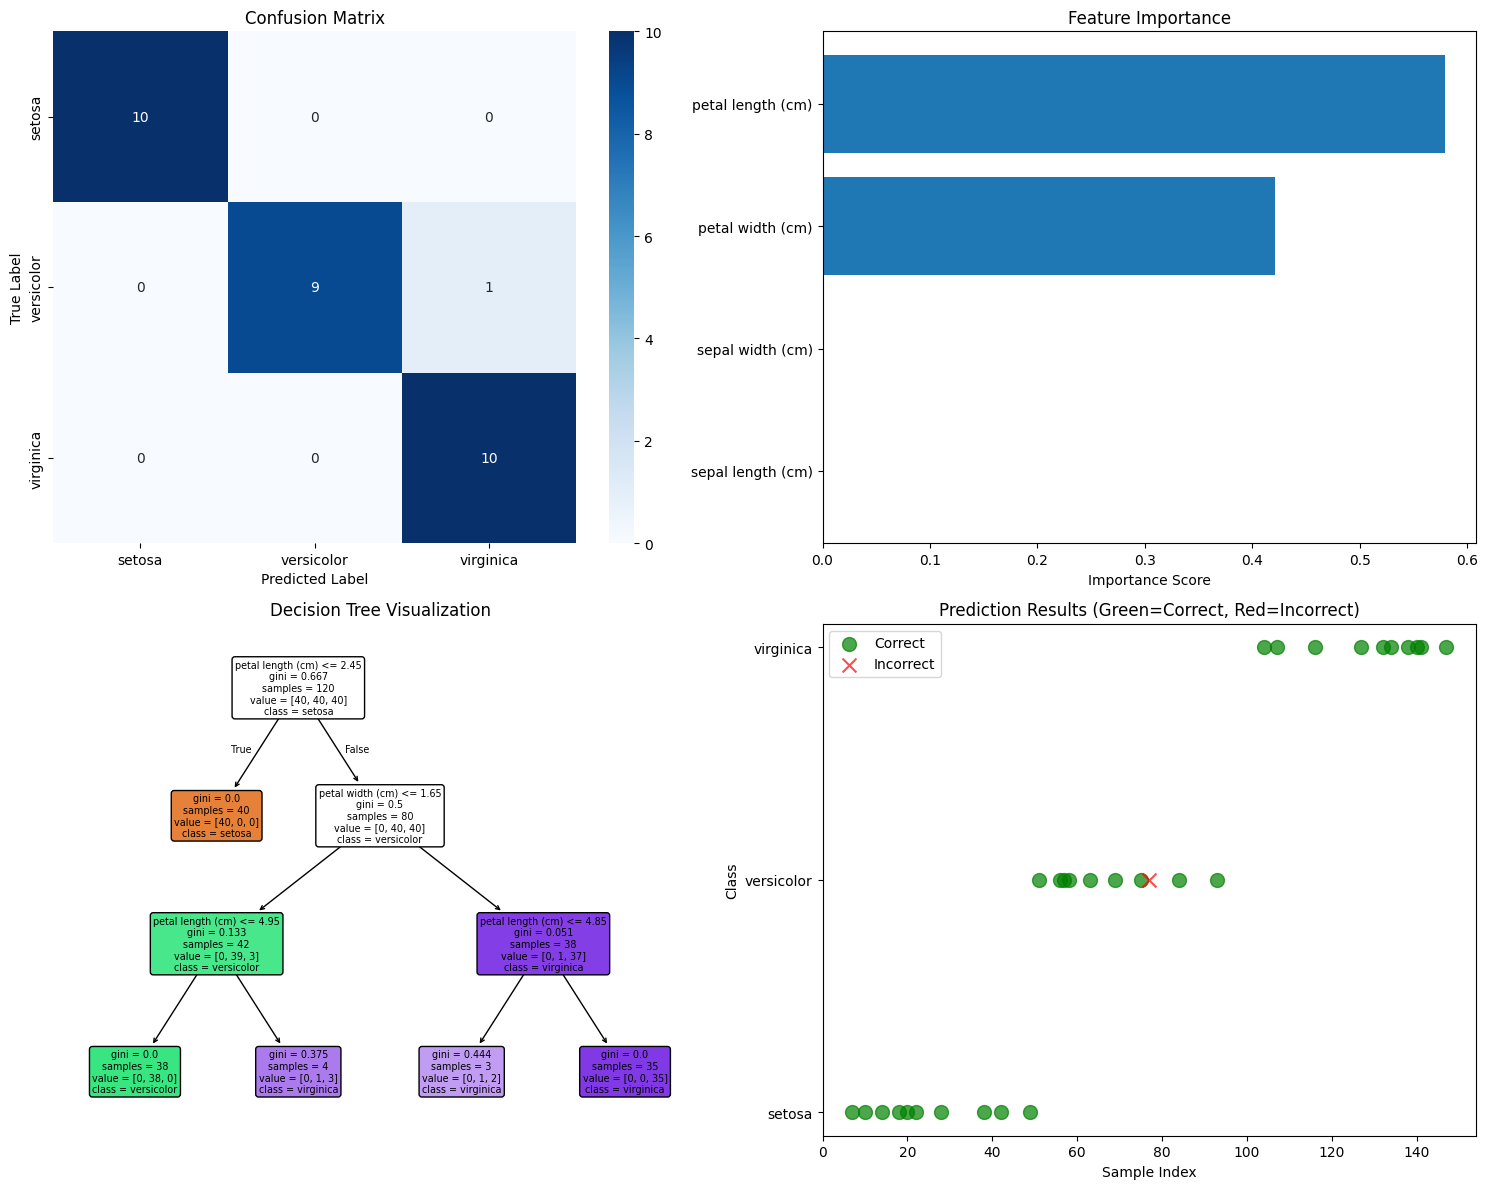

In [9]:
# Step 7: Visualize the Results
print("\n" + "=" * 50)
print("STEP 7: VISUALIZING RESULTS")
print("=" * 50)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names,
            ax=axes[0, 0])
axes[0, 0].set_title('Confusion Matrix')
axes[0, 0].set_xlabel('Predicted Label')
axes[0, 0].set_ylabel('True Label')

# 2. Feature Importance
feature_importance = pd.DataFrame({
    'feature': iris.feature_names,
    'importance': dt_classifier.feature_importances_
}).sort_values('importance', ascending=True)

axes[0, 1].barh(feature_importance['feature'], feature_importance['importance'])
axes[0, 1].set_title('Feature Importance')
axes[0, 1].set_xlabel('Importance Score')

# 3. Decision Tree Visualization
plot_tree(dt_classifier,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True,
          ax=axes[1, 0])
axes[1, 0].set_title('Decision Tree Visualization')

# 4. Actual vs Predicted comparison
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred
})
results_df['Actual_Name'] = results_df['Actual'].apply(lambda x: iris.target_names[x])
results_df['Predicted_Name'] = results_df['Predicted'].apply(lambda x: iris.target_names[x])

correct_predictions = results_df[results_df['Actual'] == results_df['Predicted']]
incorrect_predictions = results_df[results_df['Actual'] != results_df['Predicted']]

axes[1, 1].scatter(correct_predictions.index, correct_predictions['Actual'],
                   c='green', label='Correct', alpha=0.7, s=100)
axes[1, 1].scatter(incorrect_predictions.index, incorrect_predictions['Actual'],
                   c='red', label='Incorrect', alpha=0.7, s=100, marker='x')
axes[1, 1].set_title('Prediction Results (Green=Correct, Red=Incorrect)')
axes[1, 1].set_xlabel('Sample Index')
axes[1, 1].set_ylabel('Class')
axes[1, 1].set_yticks([0, 1, 2])
axes[1, 1].set_yticklabels(iris.target_names)
axes[1, 1].legend()

plt.tight_layout()
plt.show()



In [10]:
# Step 8: Model Interpretation and Final Summary
print("\n" + "=" * 50)
print("FINAL SUMMARY")
print("=" * 50)

print("\nMODEL PERFORMANCE SUMMARY:")
print(f"✅ The Decision Tree classifier achieved {test_accuracy*100:.2f}% accuracy on the test set")
print(f"✅ Precision: {precision:.4f} (ability to avoid false positives)")
print(f"✅ Recall: {recall:.4f} (ability to find all positive samples)")

if test_accuracy > 0.90:
    print("🎉 Excellent performance! The model generalizes well to unseen data.")
elif test_accuracy > 0.80:
    print("👍 Good performance! The model is learning meaningful patterns.")
else:
    print("⚠️  Consider tuning hyperparameters or trying different features.")

print(f"\nKEY INSIGHTS:")
print(f"• Most important feature: {feature_importance.iloc[-1]['feature']}")
print(f"• Tree depth: {dt_classifier.get_depth()}")
print(f"• Number of leaves: {dt_classifier.get_n_leaves()}")

print("\nPREDICTION EXAMPLE:")
# Show some actual predictions
sample_idx = 0
sample_features = X_test.iloc[sample_idx]
actual_class = iris.target_names[y_test.iloc[sample_idx]]
predicted_class = iris.target_names[y_test_pred[sample_idx]]

print(f"Sample features: {dict(sample_features)}")
print(f"Actual class: {actual_class}")
print(f"Predicted class: {predicted_class}")
print(f"Prediction: {'✅ CORRECT' if actual_class == predicted_class else '❌ INCORRECT'}")

print("\n" + "=" * 50)
print("SCRIPT COMPLETED SUCCESSFULLY!")
print("=" * 50)


FINAL SUMMARY

MODEL PERFORMANCE SUMMARY:
✅ The Decision Tree classifier achieved 96.67% accuracy on the test set
✅ Precision: 0.9697 (ability to avoid false positives)
✅ Recall: 0.9667 (ability to find all positive samples)
🎉 Excellent performance! The model generalizes well to unseen data.

KEY INSIGHTS:
• Most important feature: petal length (cm)
• Tree depth: 3
• Number of leaves: 5

PREDICTION EXAMPLE:
Sample features: {'sepal length (cm)': np.float64(4.4), 'sepal width (cm)': np.float64(3.0), 'petal length (cm)': np.float64(1.3), 'petal width (cm)': np.float64(0.2)}
Actual class: setosa
Predicted class: setosa
Prediction: ✅ CORRECT

SCRIPT COMPLETED SUCCESSFULLY!
